# Precipitation bias

## Edgar Hernandez
## email: edgar.hdz@hotmail.com

__________

Measurement underestimation is something that could lead to potential damages,  more concern should be considered when these measurements are used for the design of structures that compromise social and economic aspects if flawed. That is the case for `maximum precipitation` measurements and their use for hydraulic structure and flood designs.  The `Hershfield Factor`, HF, a correction factor which increases the underestimated precipitation measurement by a factor of `1.13` is used for this purpose, it was nevertheless derived using a `daily scale`.  In this project, a `one minute` resolution precipitation data set, composed of several Iowa stations, was used to test different outcomes when dealing with a sampling  procedure  that uses  a  fixed  time  interval.   Inasmuch  as  this  data  has  a  really fine  resolution  of  one  minute,  it  was  used  as  the  **`true`** rain  intensity.  It  was  therefore aggregated from the original one minute resolution into different `higher` time durations by also taking into consideration all possible sampling starting points in time.  This way, the sampling behavior was simulated and thus the existing bias associated to it was known. With the use of a peak over threshold analysis, depth duration frequency curves, `DDF`,for the simulated different sampling outcomes were computed.  By means of these DDF curves, a bias was computed and expressed in this project as a correction factor, which as the HF, should be used to correct the likely underestimated maximum precipitation value which was initially measured

____
## Table Of Contents

* [Importing the Dataset](#DS)
<a href='#DS'></a>

* [Data preprocessing](#proc)
<a href='#proc'></a>
    * [Add missing data](#md)
    <a href='#md'></a>
    * [Storm declusterization](#sd)
    <a href='#SD'></a>
    * [Precipitation data aggregation](#pag)
    <a href='#pag'></a>    
    * [Do the previous for all storms!](#autom)
    <a href='#autom'></a> 
    * [Summary and some results](#sum)
    <a href='#sum'></a>    
* [Peak over threshold analysis (GDP)](#gdp)
<a href='#gdp'></a>
    * [Fitted and calculated probabilities](#fitted)
    <a href='#fitted'></a>
    * [Return period plots](#ret)
    <a href='#ret'></a>
* [Depth duration frequency curves](#ddfc)
<a href='#ddfc'></a>
* [**`EXTRAS!`** New ideas](#extras)
<a href='#extras'></a>

In [1]:
from IPython.display import display

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

____
## Import `data set`<a id='DS'></a>

Precipitation data from `Iowa` can be downloaded [here](https://mesonet.agron.iastate.edu/request/asos/1min.phtml)

In [3]:
st_ames = pd.read_csv('desmoinreal.txt').drop(columns='Unnamed: 5')

In [4]:
display(st_ames.head(5))
print('matrix shape; rows:{}, cols:{}'.format(np.shape(st_ames)[0],np.shape(st_ames)[1]))

,station,station_name,valid(CST6CDT),tmpf,precip
0,DSM,DES MOINES,2000-01-01 00:00,39.0,0.0
1,DSM,DES MOINES,2000-01-01 00:01,39.0,0.0
2,DSM,DES MOINES,2000-01-01 00:02,39.0,0.0
3,DSM,DES MOINES,2000-01-01 00:03,38.0,0.0
4,DSM,DES MOINES,2000-01-01 00:04,38.0,0.0


matrix shape; rows:8045316, cols:5


________
## Data preprocessing<a id='proc'></a>

In [5]:
st_ames = st_ames.rename(columns={'valid(CST6CDT)':'UTC'})

In [6]:
st_ames['time'] = [np.datetime64(things) for things in st_ames.UTC]

In [7]:
diff = st_ames.time.values[1::]-st_ames.time.values[0:-1]

In [8]:
st_ames = st_ames[1::].reset_index().drop(columns='index')

In [9]:
st_ames['diff'] = diff

In [10]:
ydata = len(st_ames)/60/24/365
print("Years of data: %.2f"%(ydata))

Years of data: 15.31


In [11]:
t = np.datetime64('005-03-07 11:04:00')- np.datetime64('005-03-07 11:03:00')

Showing `data` where there are missing data points

In [12]:
st_ames[(st_ames['diff']>t)&(st_ames.precip>=0.01)]

,station,station_name,UTC,tmpf,precip,time,diff
219748,DSM,DES MOINES,2000-06-12 15:52,77.0,0.01,2000-06-12 15:52:00,00:04:00
220592,DSM,DES MOINES,2000-06-13 12:53,69.0,0.04,2000-06-13 12:53:00,00:04:00
220594,DSM,DES MOINES,2000-06-13 12:58,66.0,0.11,2000-06-13 12:58:00,00:04:00
220596,DSM,DES MOINES,2000-06-13 13:02,67.0,0.05,2000-06-13 13:02:00,00:03:00
227169,DSM,DES MOINES,2000-06-19 23:05,72.0,0.01,2000-06-19 23:05:00,00:03:00
231296,DSM,DES MOINES,2000-06-23 20:59,71.0,0.07,2000-06-23 20:59:00,00:02:00
231299,DSM,DES MOINES,2000-06-23 21:04,71.0,0.02,2000-06-23 21:04:00,00:03:00
235168,DSM,DES MOINES,2000-06-28 09:37,63.0,0.01,2000-06-28 09:37:00,00:03:00
235191,DSM,DES MOINES,2000-06-28 10:16,62.0,0.01,2000-06-28 10:16:00,00:03:00
235205,DSM,DES MOINES,2000-06-28 10:38,62.0,0.01,2000-06-28 10:38:00,00:04:00


Drop `NaN` values, so that they can be processed later on by taking them as missed data points

In [13]:
for indx in st_ames[(st_ames['diff']>t)&(st_ames.precip>=0.01)].index:
    print(indx)
    counter = 0
     ##Automate this part
    while (np.sum(st_ames.iloc[indx-counter:indx+10-counter].precip)!=0):
        #print('The count is:', counter)
        counter+=1
    #print('Index where precip is 0, index: {}'.format(indx-counter))

    idx_min = indx-counter
    
    while (np.sum(st_ames.iloc[indx+counter:indx+10+counter].precip)!=0):
    #print('The count is:', counter)
        counter+=1
    #print('Index where precip is 0, index: {}'.format(indx+counter))

    idx_max = indx+counter
    
    if np.shape(st_ames.iloc[idx_min:idx_max][st_ames.isnull().precip])[0]!=0:
        print('processing index: {}'.format(indx))
        index_nan = st_ames.iloc[idx_min:idx_max][st_ames.isnull().precip].index[0]
    
        st_ames = st_ames.drop(index=index_nan)
        time_diff = st_ames.loc[st_ames.index==index_nan+1].time-st_ames.iloc[index_nan-1].time
        st_ames.loc[st_ames.index==index_nan+1, 'diff'] = time_diff

        
st_ames = st_ames.reset_index()

219748


/home/edgar/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


220592
220594
220596
227169
231296
231299
235168
235191
235205
235217
240716
241913
241915
241921
241924
241927
667552
1010202
1160611
1160613
1591538
1732952
2348196
2348199
2348201
3929585
4375995
4904337


Locate where there is `missing data`, and adds data points by following the shape of the storm event

In [14]:
#fig, ax = plt.subplots(2,2,figsize=(15,10))
md_indx=[]
md_to_add = {}
for indx in st_ames[(st_ames['diff']>t)&(st_ames.precip>=0.01)].index:
#for indx,coords in zip(st_ames[(st_ames['diff']>t)&(st_ames.precip>=0.01)].index,[(0,0),(0,1),(1,0),(1,1)]):
    #print(indx)
    md_indx.append(indx)
   
    counter = 0
    
    while (np.sum(st_ames.iloc[indx-counter:indx+10-counter].precip)!=0):
        #print('The count is:', counter)
        counter+=1
    #print('Index where precip is 0, index: {}'.format(indx-counter))

    idx_min = indx-counter
    
    counter = 0
    while (np.sum(st_ames.iloc[indx+counter:indx+10+counter].precip)!=0):
        #print('The count is:', counter)
        counter+=1
    #print('Index where precip is 0, index: {}'.format(indx+counter))

    idx_max = indx+counter
 
    #ax[coords].plot(st_ames.iloc[idx_min:idx_max].time,st_ames.iloc[idx_min:idx_max].precip)
    #ax[coords].plot(st_ames.iloc[indx-1:indx+1].time,st_ames.iloc[indx-1:indx+1].precip,'r',linewidth=2)
    #ax[coords].grid(True)

    if (np.sum(st_ames.iloc[idx_min:idx_max].precip)>0.01) & (st_ames.iloc[indx]['diff'].total_seconds()/60/60<=2):
        print('processing index: {}'.format(indx))
        frame = []
        t_step= 0
        minutes_ = st_ames.iloc[[indx]]['diff'].min().total_seconds()/60
        slope = (st_ames.iloc[indx].precip-st_ames.iloc[indx-1].precip)/(minutes_)

        time_ = st_ames.iloc[indx-1].time

        for i in range(1,int(minutes_)):

            a = st_ames.iloc[[indx]]
            t_step+=1
            time_ += t

            a['precip'] = st_ames.iloc[indx-1].precip + slope*t_step
            a['time'] = time_


            frame.append(a)

        md_to_add['{}'.format(indx)] = pd.concat(frame)
    else:
        print('not processing, index: {}'.format(indx))

processing index: 219748
processing index: 220592


/home/edgar/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/edgar/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


processing index: 220594
processing index: 220596
not processing, index: 227169
processing index: 231296
processing index: 231299
not processing, index: 235168
processing index: 235191
processing index: 235205
processing index: 235217
processing index: 240716
processing index: 241913
processing index: 241915
processing index: 241921
processing index: 241924
processing index: 241927
not processing, index: 667552
processing index: 1010202
processing index: 1160611
processing index: 1160613
processing index: 1591538
not processing, index: 1732952
processing index: 2348196
processing index: 2348199
processing index: 2348201
processing index: 3929585
not processing, index: 4375995
not processing, index: 4904337


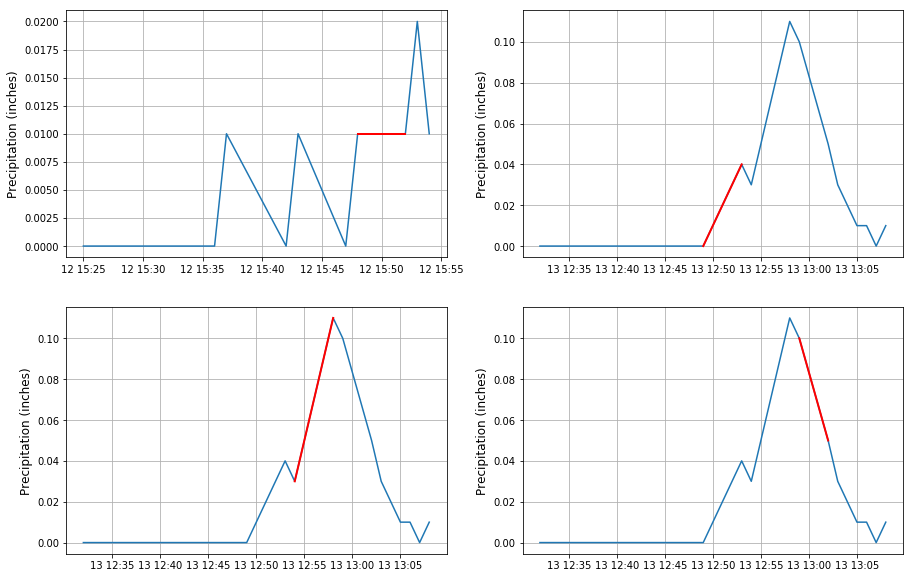

In [20]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
md_indx = []
for indx,coords in zip(st_ames[(st_ames['diff']>t)&(st_ames.precip>=0.01)].index,[(0,0),(0,1),(1,0),(1,1)]):
    #print(indx)
    md_indx.append(indx)
   
    counter = 0
    
    while (np.sum(st_ames.iloc[indx-counter:indx+10-counter].precip)!=0):
        #print('The count is:', counter)
        counter+=1
    #print('Index where precip is 0, index: {}'.format(indx-counter))

    idx_min = indx-counter
    
    counter = 0
    while (np.sum(st_ames.iloc[indx+counter:indx+10+counter].precip)!=0):
        #print('The count is:', counter)
        counter+=1
    #print('Index where precip is 0, index: {}'.format(indx+counter))

    idx_max = indx+counter
 
    ax[coords].plot(st_ames.iloc[idx_min:idx_max].time,st_ames.iloc[idx_min:idx_max].precip)
    ax[coords].plot(st_ames.iloc[indx-1:indx+1].time,st_ames.iloc[indx-1:indx+1].precip,'r',linewidth=2)
    ax[coords].grid(True)
    ax[coords].set_ylabel(r'Precipitation (inches)',fontsize = 12)


The graphs above, show in red the `added data` points where data was missing. Just 4 example rain events are shown

### Add missing data<a id='md'></a>

In [15]:
to_concat = {}
init_=0
for key in md_to_add.keys():
    end_=int(key)
    test = md_to_add[key]
    
    to_concat[key] = pd.concat([st_ames.iloc[init_:end_],test])
    init_=int(key)
to_concat['last'] = pd.concat([st_ames.iloc[init_::]])

In [16]:
to_concat['{}'.format(md_indx[0])][md_indx[0]-10:md_indx[0]+10]

,index,station,station_name,UTC,tmpf,precip,time,diff
219738,219738,DSM,DES MOINES,2000-06-12 15:32,79.0,0.00,2000-06-12 15:32:00,00:01:00
219739,219739,DSM,DES MOINES,2000-06-12 15:33,78.0,0.00,2000-06-12 15:33:00,00:01:00
219740,219740,DSM,DES MOINES,2000-06-12 15:34,79.0,0.00,2000-06-12 15:34:00,00:01:00
219741,219741,DSM,DES MOINES,2000-06-12 15:35,78.0,0.00,2000-06-12 15:35:00,00:01:00
219742,219742,DSM,DES MOINES,2000-06-12 15:36,78.0,0.00,2000-06-12 15:36:00,00:01:00
219743,219743,DSM,DES MOINES,2000-06-12 15:37,78.0,0.01,2000-06-12 15:37:00,00:01:00
219744,219744,DSM,DES MOINES,2000-06-12 15:42,78.0,0.00,2000-06-12 15:42:00,00:05:00
219745,219745,DSM,DES MOINES,2000-06-12 15:43,78.0,0.01,2000-06-12 15:43:00,00:01:00
219746,219746,DSM,DES MOINES,2000-06-12 15:47,77.0,0.00,2000-06-12 15:47:00,00:04:00
219747,219747,DSM,DES MOINES,2000-06-12 15:48,77.0,0.01,2000-06-12 15:48:00,00:01:00


In [17]:
frame = []
for key in to_concat.keys():
    frame.append(to_concat[key])
    
#st_ames_new = pd.concat(frame).reset_index().drop(columns='index')
st_ames_new = pd.concat(frame).reset_index()

In [18]:
np.shape(st_ames_new)

(8045371, 9)

In [19]:
st_ames_new = st_ames_new.drop(columns=['index','level_0'])
st_ames_new.head(6)

,station,station_name,UTC,tmpf,precip,time,diff
0,DSM,DES MOINES,2000-01-01 00:01,39.0,0.0,2000-01-01 00:01:00,00:01:00
1,DSM,DES MOINES,2000-01-01 00:02,39.0,0.0,2000-01-01 00:02:00,00:01:00
2,DSM,DES MOINES,2000-01-01 00:03,38.0,0.0,2000-01-01 00:03:00,00:01:00
3,DSM,DES MOINES,2000-01-01 00:04,38.0,0.0,2000-01-01 00:04:00,00:01:00
4,DSM,DES MOINES,2000-01-01 00:05,38.0,0.0,2000-01-01 00:05:00,00:01:00
5,DSM,DES MOINES,2000-01-01 00:06,38.0,0.0,2000-01-01 00:06:00,00:01:00


In [20]:
print('matrix size: {}'.format(np.shape(st_ames_new)))

matrix size: (8045371, 7)


_____
### Storm declusterization<a id='sd'></a>

In [21]:
diff_index = st_ames_new[st_ames_new.precip>=0.01].index[1::]-st_ames_new[st_ames_new.precip>=0.01].index[0:-1]

In [22]:
print('Data points containing precipitation information: {}'.format(len(st_ames_new[st_ames_new.precip>=0.01])))

Data points containing precipitation information: 41473


In [23]:
new_st_ames = st_ames_new[st_ames_new.precip>=0.01][1::]

In [24]:
new_st_ames['diff_index'] = diff_index

`Storm` separation based on the index difference instead of time difference. Here it should only take the indices, which will be used later to find the storms based on a previous algorithm


In [25]:
counter = 0
frame=[]
storms={}
for i in range(0,len(new_st_ames)-1):
    #print(i)
    
    if new_st_ames.iloc[[i]]['diff_index'].values < 90: ##it takes the indices, meaning that it would be 
        #print('yes')

        frame.append(new_st_ames.iloc[[i]])
        
    elif (new_st_ames.iloc[[i]]['diff_index'].values > 90) & (frame !=[]):
        counter+=1
        storms["{}".format(counter)]=pd.concat(frame)
        frame = []

In [ ]:
print('No. of storms: {}'.format(len(storms)))

In [26]:
frame = []
for key in storms.keys():
    mass = sum(storms[key].precip)
    duration = storms[key].time.iloc[-1] - storms[key].time.iloc[0]
    frame.append([mass, duration, key])

In [27]:
st_ames_storms = pd.DataFrame(frame)

In [28]:
st_ames_storms = st_ames_storms.rename(columns={0:'mass',1:'duration',2:'storm'})

In [31]:
display(st_ames_storms.sort_values(by = ['mass'],ascending=False).head(10))
print('matrix size: {}'.format(np.shape(st_ames_storms)))

,mass,duration,storm
1453,3.70,1 days 02:03:00,1454
873,3.48,0 days 03:27:00,874
1720,3.47,0 days 04:52:00,1721
1360,3.26,0 days 03:20:00,1361
1755,2.54,0 days 06:44:00,1756
475,2.52,0 days 03:51:00,476
1784,2.52,1 days 05:58:00,1785
1625,2.50,0 days 03:05:00,1626
1279,2.48,0 days 06:37:00,1280
1735,2.42,0 days 07:33:00,1736


matrix size: (1903, 3)


`Here`, the storms are located, by going upwards and backwards finding nearby precipitation data. 

In [32]:
storms_new = {}

In [33]:
for indx_key in storms.keys():
    
    #indx_key = '1004'
    #indx_key = '199'

    middle_ = int(np.round(len(storms[indx_key].index)/2))

    indx = storms[indx_key].iloc[[middle_]].index[0]


    counter = 0

    while (np.sum(st_ames_new.iloc[indx-counter:indx+10-counter].precip)!=0):
        #print('The count is:', counter)
        counter+=1
    #print('Index where precip is 0, index: {}'.format(indx-counter))

    idx_min = indx-counter

    counter = 0
    while (np.sum(st_ames_new.iloc[indx+counter:indx+10+counter].precip)!=0):
        #print('The count is:', counter)
        counter+=1
    #print('Index where precip is 0, index: {}'.format(indx+counter))

    idx_max = indx+counter
    
    prc_storm = st_ames_new.iloc[idx_min:idx_max].reset_index()
    indx_min,indx_max = prc_storm[prc_storm.precip>0].index[0],prc_storm[prc_storm.precip>0].index[-1]
    prc_storm = prc_storm.iloc[indx_min:indx_max+1].reset_index().drop(columns='level_0')

    #storms_new[indx_key] = st_ames_new.iloc[idx_min:idx_max]
    storms_new[indx_key] = prc_storm


`Storm filtration` based on whether there was likely snow. Meaning that the data could not be taken as precipitation 

In [34]:
storms_filtered = {}

for key in storms_new.keys():
    if np.average(storms_new[key].tmpf)>33:
        storms_filtered['{}'.format(key)] = storms_new[key]

In [35]:
extract_storms =st_ames_storms.sort_values(by = ['mass'],ascending=False).iloc[0:50]

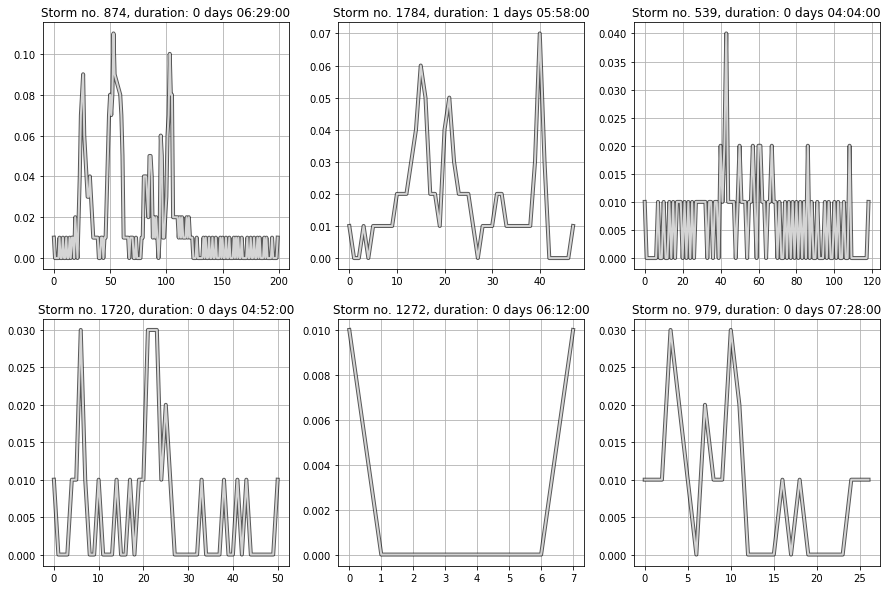

In [38]:
fig, ax = plt.subplots(2,3,figsize=(15,10))

choose_num =np.random.choice(list(extract_storms.index),6, [1/len(extract_storms) for things in extract_storms])
counter = -1

for j in range(0,2):
    
    
    for i in range(0,3): 
        counter +=1
        #print(j,i)
        ax[j,i].plot(storms_filtered['{}'.format(choose_num[counter])].precip, linewidth = 4,color ='black',alpha= 0.65)
        ax[j,i].plot(storms_filtered['{}'.format(choose_num[counter])].precip, linewidth = 2,color='white',alpha= 0.75)
        
        #print(i+j)
        
        duration = extract_storms.duration.loc[choose_num[counter]]
        ax[j,i].set_title(r'Storm no. {}, duration: {}'.format(choose_num[counter],duration))
        ax[j,i].grid(True)

### Precipitation data aggregation<a id='pag'></a>

Here we will aggregate the `1 minute` precipitation data into different time resolutions, i.e., `10`, `15`, `25`, ..., `60` etc.

First example, adding some zero values before and after a rain event

In [39]:
frame_2 = [np.zeros(60),storms_filtered['205'].precip.values,np.zeros(60)]

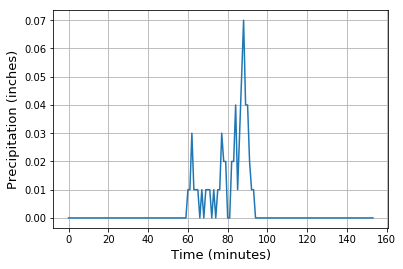

In [40]:
plt.plot([things for sublist in frame_2 for things in sublist])
plt.gca().set_ylabel(r'Precipitation (inches)',fontsize = 13)
plt.gca().set_xlabel(r'Time (minutes)',fontsize = 13)
plt.gca().grid(True)

plt.show()

In [41]:
example_storm = [things for sublist in frame_2 for things in sublist]

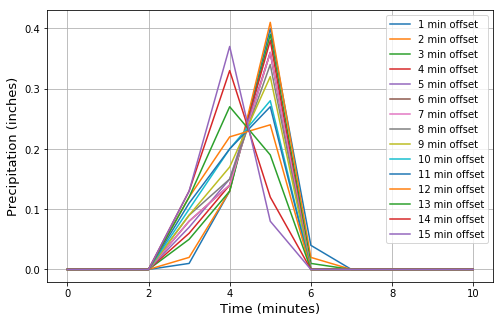

In [42]:
plt.figure(figsize=(8,5))
resol = 15
storm_peak = []
for j in range(1,resol+1):
    msrmnt=[]
    for i in np.arange(0,len(example_storm),resol):
        a = sum(example_storm[i+j:i+resol+j])
        msrmnt.append(a)
    
    
    
    plt.plot(msrmnt,label = '{} min offset'.format(j))
    plt.gca().set_ylabel(r'Precipitation (inches)',fontsize = 13)
    plt.gca().set_xlabel(r'Time (minutes)',fontsize = 13)
    plt.legend()
    plt.gca().grid(True)


    storm_peak.append(np.max(msrmnt))
plt.show()

As seen above, the graph shows the different peaks that can be obtained by varying where the measurement device started to `log`the precipitation data

In [43]:
from mpl_toolkits.mplot3d import Axes3D

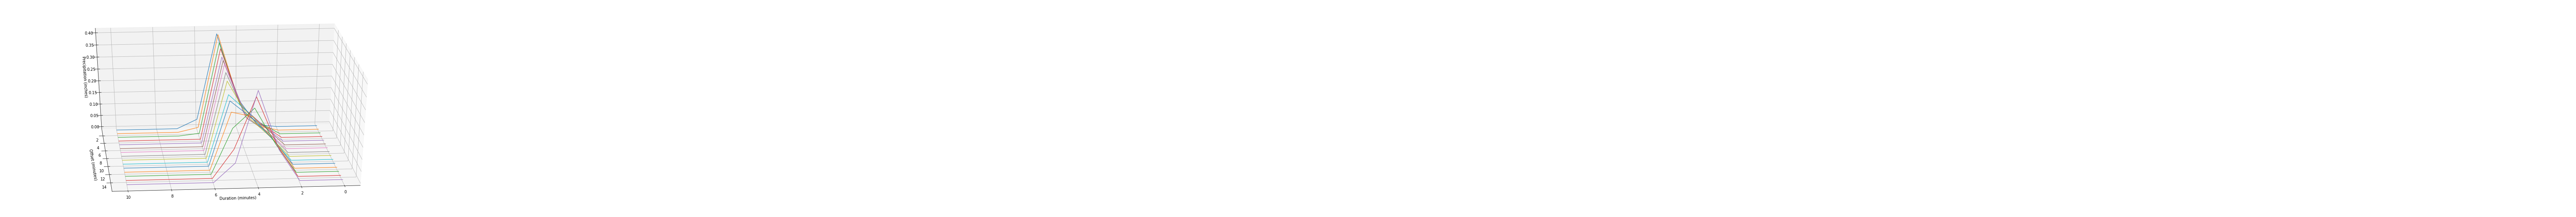

In [44]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
resol = 15

for j in range(1,resol+1):
    
    msrmnt=[]
    for i in np.arange(0,len(example_storm),resol):
        a = sum(example_storm[i+j:i+resol+j])
        msrmnt.append(a)
    
    xs = np.arange(0,len(msrmnt),1)
    ys = msrmnt

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    ax.plot(xs, ys, zs=j, zdir='y', alpha=0.8)

ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Offset (minutes)')
ax.set_zlabel('Precipitation (inches)')
ax.view_init(elev=30, azim=85)

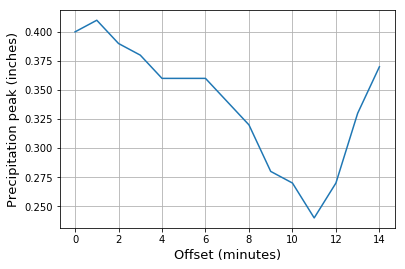

In [45]:
ax = plt.gca()
plt.plot(storm_peak)
ax.grid(True)
ax.set_ylabel(r'Precipitation peak (inches)',fontsize =13)
ax.set_xlabel(r'Offset (minutes)',fontsize =13)
plt.show()

Being the `1 min offset` the one yielding the highest peak or the `True maximum peak`, and the `11 min offset` the `worst case scenario`

__________

From the `filtered` storms, we localize whether there are `NaN` values, in order to process them and take them as missing points. Since it could also be that these storms have these type of values.

In [46]:
for key in storms_filtered.keys():
    idx_min, idx_max = storms_filtered[key].index[0],storms_filtered[key].index[-1]
    #print(key)
    if np.shape(storms_filtered[key].iloc[idx_min:idx_max][storms_filtered[key].isnull().precip])[0]!=0:
        print('proccesing storm index: {}'.format(key))
        index_nan = storms_filtered[key].iloc[idx_min:idx_max][storms_filtered[key].isnull().precip].index[0]
    
        storms_filtered[key] = storms_filtered[key].drop(index=index_nan)
        time_diff = storms_filtered[key].loc[storms_filtered[key].index==index_nan+1].time-storms_filtered[key].iloc[index_nan-1].time
        storms_filtered[key].loc[storms_filtered[key].index==index_nan+1, 'diff'] = time_diff
        
        storms_filtered[key] = storms_filtered[key].reset_index()
        

/home/edgar/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


_____
### Automate the thingy `done` before for all of the declusterized storms<a id='autom'></a>

Here, aggregated precipitation data is obtained from the `1 minute` precipitation `data`. All possible measurement `offsets` are also calculated

>**NOTE**: Also the `1 minute` data from where the `aggregated` series were obtained is saved. This will be explained and shown further down in the notebook



In [47]:
storms_agg = {}
storms_agg_all = {}

In [48]:
rs = [5,10,15,25,45,60,80]

for resol in rs:
    storms_agg['{}'.format(resol)] = {}
    storms_agg_all['{}'.format(resol)] = {}
    for indx in storms_filtered:
        
        frame_2 = [np.zeros(resol),storms_filtered[indx].precip.values,np.zeros(resol)]
        #frame_2 = [storms_filtered[indx].precip.values,np.zeros(60)]
        example_storm = [things for sublist in frame_2 for things in sublist]



        storm_peak = []
        for j in range(1,resol+1):
            msrmnt=[]
            msrmnt_all = []
            for i in np.arange(0,len(example_storm),resol):
                a = sum(example_storm[i+j:i+resol+j])
                b = example_storm[i+j:i+resol+j]
                msrmnt.append(a)
                msrmnt_all.append(b)

            storms_agg_all['{}'.format(resol)]['{}_{}'.format(indx,j)] = msrmnt
            storms_agg_all['{}'.format(resol)]['{}_{}_dec'.format(indx,j)] = msrmnt_all
            #plt.plot(msrmnt)
            storm_peak.append(np.max(msrmnt))


        storms_agg['{}'.format(resol)]['{}'.format(indx)] = storm_peak

Bellow, it can be seen the aggregated series and where did this aggregated series came from (from the 1 minute resolution data)

We do this in order to further use this data distribution for possibly `Disaggregation` studies

>**NOTE**: This part was not investigated on the `project work`

In [49]:
pd.DataFrame({'aggregated':storms_agg_all['15']['41_1'],'original_1min':storms_agg_all['15']['41_1_dec']})

,aggregated,original_1min
0,0.01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0.80,"[0.02, 0.03, 0.04, 0.03, 0.05, 0.07, 0.09, 0.1..."
2,0.02,"[0.01, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
3,0.00,"[0.0, 0.0, 0.0]"


____
Calculate the `maximum`, `minimum` and `average` peak values from all obtained measurement resolutions

In [50]:
max_min_dict = {}

for key in storms_agg.keys():
    max_min_matrix = []
    for i in storms_agg[key].keys():
        a = np.max(storms_agg[key][i])
        b = np.min(storms_agg[key][i])
        c = np.average(storms_agg[key][i])
        l = pd.DataFrame({'precip':storms_agg_all[key]['{}_2'.format(i)]})
        
        indx_max,indx_min = l[l.precip!=0].iloc[[-1]].index[0],l[l.precip!=0].iloc[[0]].index[0]
        l = l.iloc[indx_min:indx_max+1].reset_index()
        l = len(l.precip)
        max_min_matrix.append((a,b,i,l,c))
    
        
    max_min_df = pd.DataFrame(max_min_matrix).rename(columns={0:'max',1:'min',2:'index',3:'length',4:'average'})
    max_min_df['bias'] = max_min_df['min']/max_min_df['max']

    max_min_dict[key] = max_min_df

In [51]:
test_ = max_min_dict['45'][max_min_dict['45']['length']>=0]

_____
### Summary of processed data<a id='sum'></a>

Seeing graphically whatsup with the `data`


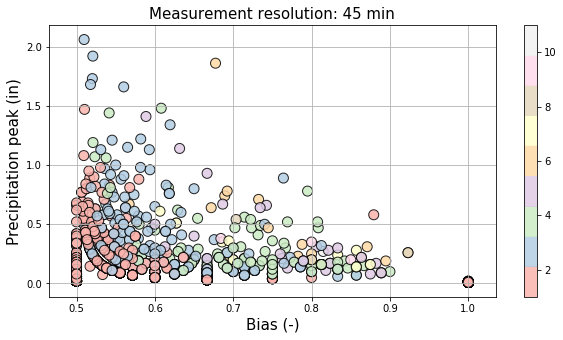

In [52]:
plt.figure(figsize=(10,5))
ax = plt.gca()
#plt.figure(figsize = (10,5))
x = test_['bias']
y = test_['max']
clr = test_['length']
plt.colorbar(plt.scatter(x,y,c=clr,cmap='Pastel1',s=100,edgecolors='black',alpha = .85))
ax.grid(True)
ax.set_ylabel(r'Precipitation peak (in)',fontsize = 15)
ax.set_xlabel(r'Bias (-)',fontsize = 15)
ax.set_title(r'Measurement resolution: {} min'.format(45),fontsize = 15)
plt.show()

The colorbar indicates the duration in hours from the `rain events`

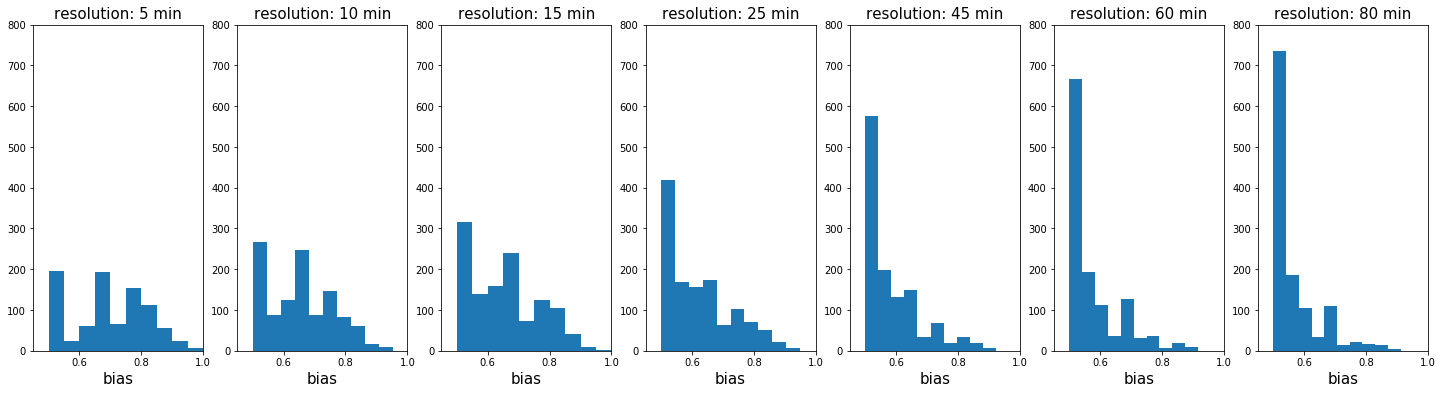

In [55]:
fig ,ax = plt.subplots(1,7,figsize=(25,6))

i=-1
for key in list(max_min_dict.keys()):
    i+=1
    ax[i].hist(max_min_dict[key][max_min_dict[key]['bias']<1]['bias'])
    ax[i].set_title(r'resolution: {} min'.format(key),fontsize=15)
    ax[i].set_ylim(0,800)
    ax[i].set_xlim(0.45,1)
    ax[i].set_xlabel(r'bias',fontsize=15)
    plt.plot()

In these `histograms`, one can see that by increasing the measurement resolution, the worst case bias value (0.5) also increases in frequency. The `bias` here is defined as $\large \frac{Min_{Precip}}{Max_{Precip}}$, where $Min_{precip}$ stands for the minimum peak measured from the different measurement starting positions, and $Max_{precip}$ is the maximum peak possible

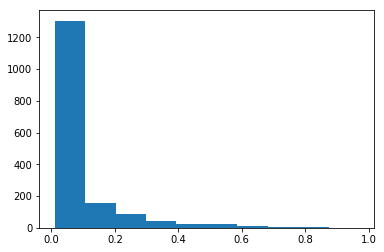

In [54]:
plt.hist(max_min_dict['10'].sort_values(by=['max'],ascending=False)['max'])
plt.show()

____________

## GPD fitting<a id='gdp'></a>
#### For `peak over threshold` analysis

>**NOTE:** In theproject work, this was part was not calculated using python, but using an `R-package`. [The POT Package](pot.r-forge.r-project.org). Here I make a simplified fitting to a GDP distribution. 

### For the fitting,
The standard cumulative distribution function (cdf) of the GPD is defined by:

$\large {\frac  {1}{\sigma }}(1+\xi z)^{{-(1/\xi +1)}}$, For $\xi \neq 0$

$1-(1+\xi z)^{{-1/\xi }}$, For $\xi = 0$

with $z$ as:

$\large z={\frac  { \large x-\mu }{\sigma }}$

Where $\mu$, $\sigma$, and $\xi$ are the location, scale and shape respectivelly

In [56]:
max_min_dict.keys()

dict_keys(['5', '10', '15', '25', '45', '60', '80'])

In [57]:
thr = [0.196,0.394,0.35,0.45,0.5,0.65,0.8]

In [58]:
from scipy.optimize import curve_fit

In [59]:
def func(x, m, s):
    return 1-np.exp(-(x-m)/s)

In [60]:
def ret_per(period,prob):
    return 1/(period*(1-prob))

_______
### Fitted and calculated probabilities<a id='fitted'></a>

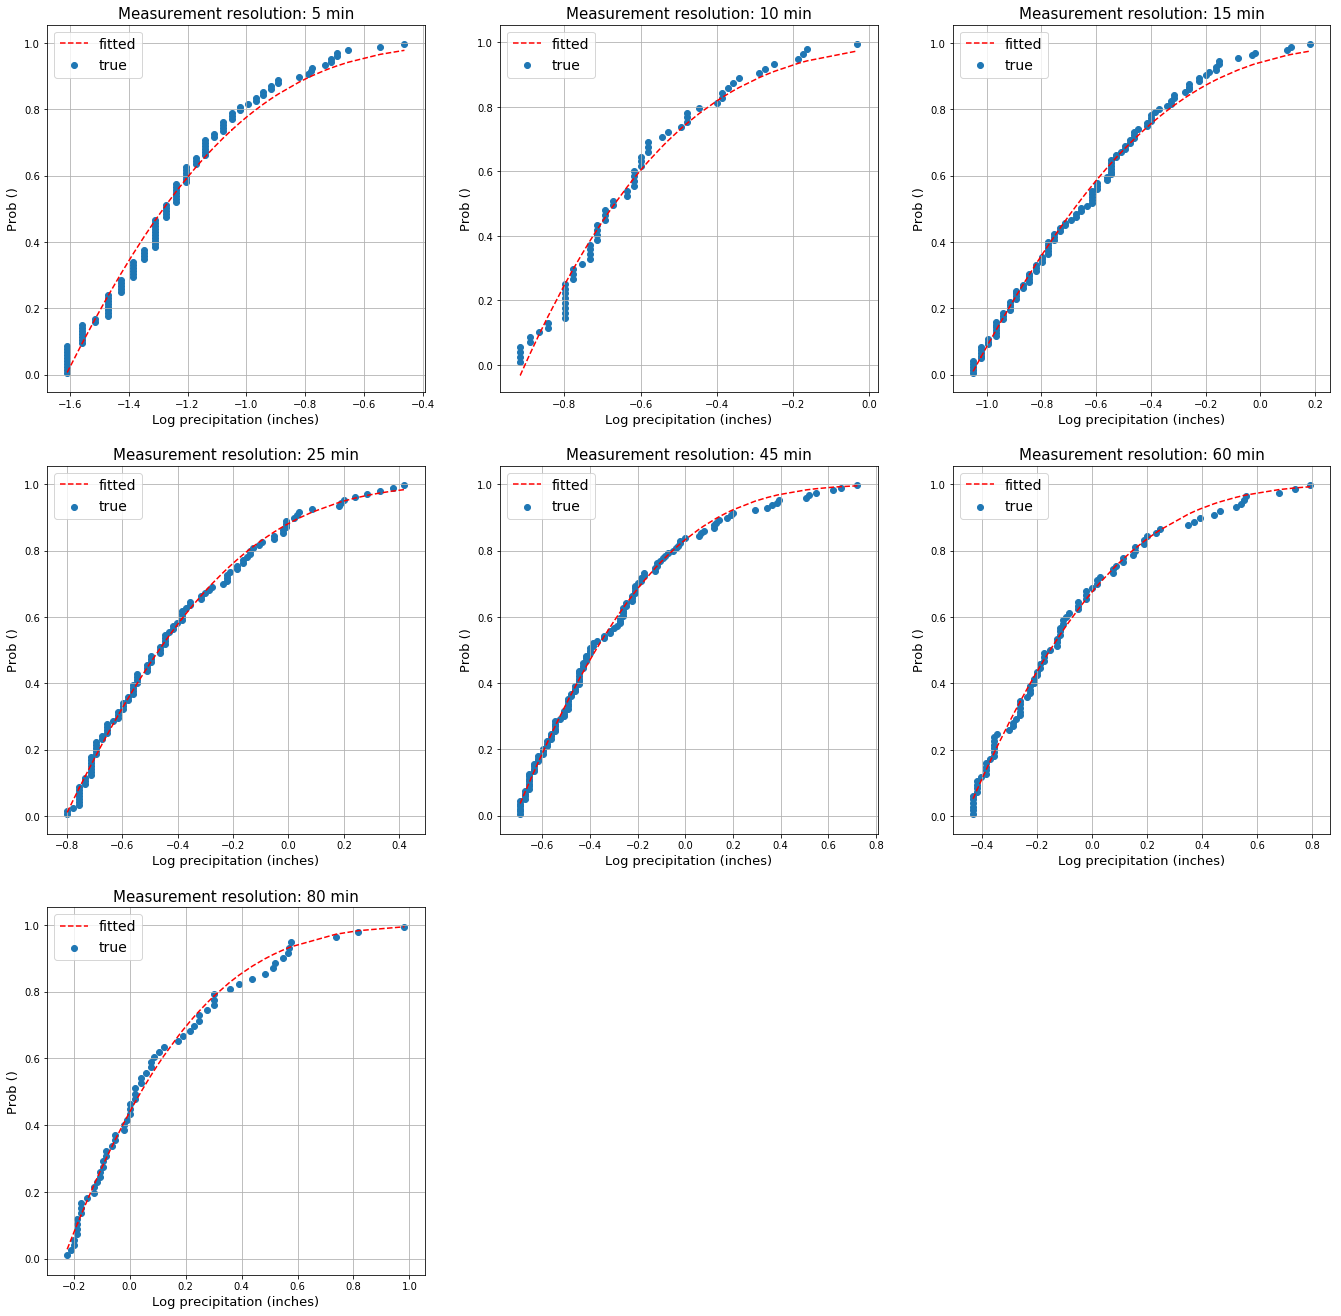

In [61]:
fig,ax = plt.subplots(3,3,figsize=(23,23))

for key,t,coords in zip(max_min_dict.keys(),thr,[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0)]):
    dict_ = max_min_dict[key][(max_min_dict[key]['max'].isnull()==False)&(max_min_dict[key]['max']>t)]
    max_list = dict_.sort_values(by='max',ascending=True)['max']
    npy = len(max_list)/ydata
    max_list = max_list.reset_index().drop(columns='index')
    max_list['index_'] = [things + 1 for things in max_list.index]
    max_list['max_mm'] = max_list['max']*25.4
    max_list_mm = max_list[max_list['max_mm']<200]
    pj = (max_list_mm.index_ - 0.35)/len(max_list_mm)
    x =max_list_mm['max'].values
    y = pj
    popt,pcov = curve_fit(func,x,y)

    ax[coords].plot(np.log(x),func(x,*popt),'r--',label='fitted')
    ax[coords].scatter(np.log(max_list_mm['max'].values),pj,label='true')
    ax[coords].set_xlabel(r'Log precipitation (inches)',fontsize=13)
    ax[coords].set_ylabel(r'Prob ()',fontsize = 13)
    ax[coords].set_title(r'Measurement resolution: {} min'.format(key),fontsize=15)
    ax[coords].legend(fontsize=14)
    ax[coords].grid(True)
fig.delaxes(ax[(2,1)])
fig.delaxes(ax[(2,2)])

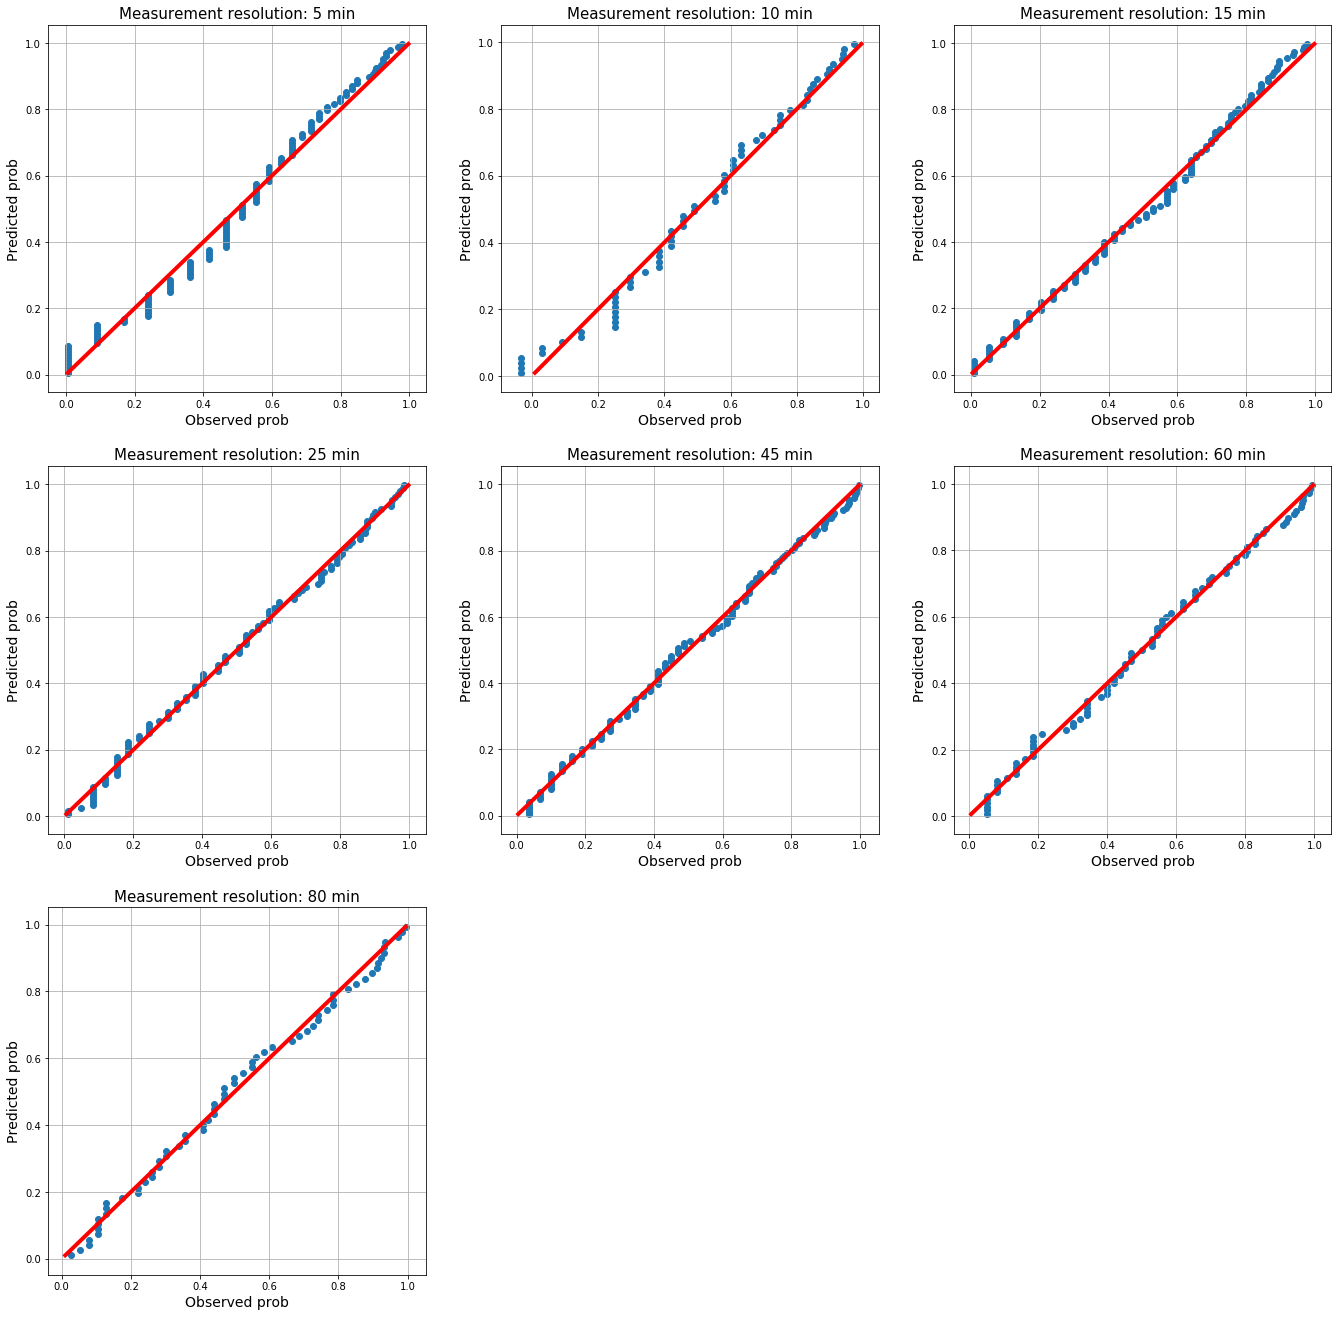

In [62]:
fig,ax = plt.subplots(3,3,figsize=(23,23))

for key,t,coords in zip(max_min_dict.keys(),thr,[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0)]):
    dict_ = max_min_dict[key][(max_min_dict[key]['max'].isnull()==False)&(max_min_dict[key]['max']>t)]
    max_list = dict_.sort_values(by='max',ascending=True)['max']
    npy = len(max_list)/ydata
    max_list = max_list.reset_index().drop(columns='index')
    max_list['index_'] = [things + 1 for things in max_list.index]
    max_list['max_mm'] = max_list['max']*25.4
    max_list_mm = max_list[max_list['max_mm']<200]
    pj = (max_list_mm.index_ - 0.35)/len(max_list_mm)
    x =max_list_mm['max'].values
    y = pj
    popt,pcov = curve_fit(func,x,y)

    ax[coords].scatter(func(x,*popt),pj)
    ax[coords].plot(pj,pj,'r',linewidth=4)
    ax[coords].grid(True)
    ax[coords].set_ylabel('Predicted prob',fontsize=14)
    ax[coords].set_xlabel('Observed prob',fontsize=14)
    ax[coords].set_title(r'Measurement resolution: {} min'.format(key),fontsize=15)
fig.delaxes(ax[(2,1)])
fig.delaxes(ax[(2,2)])

In [63]:
import matplotlib

_______
### Return period plots<a id='ret'></a>

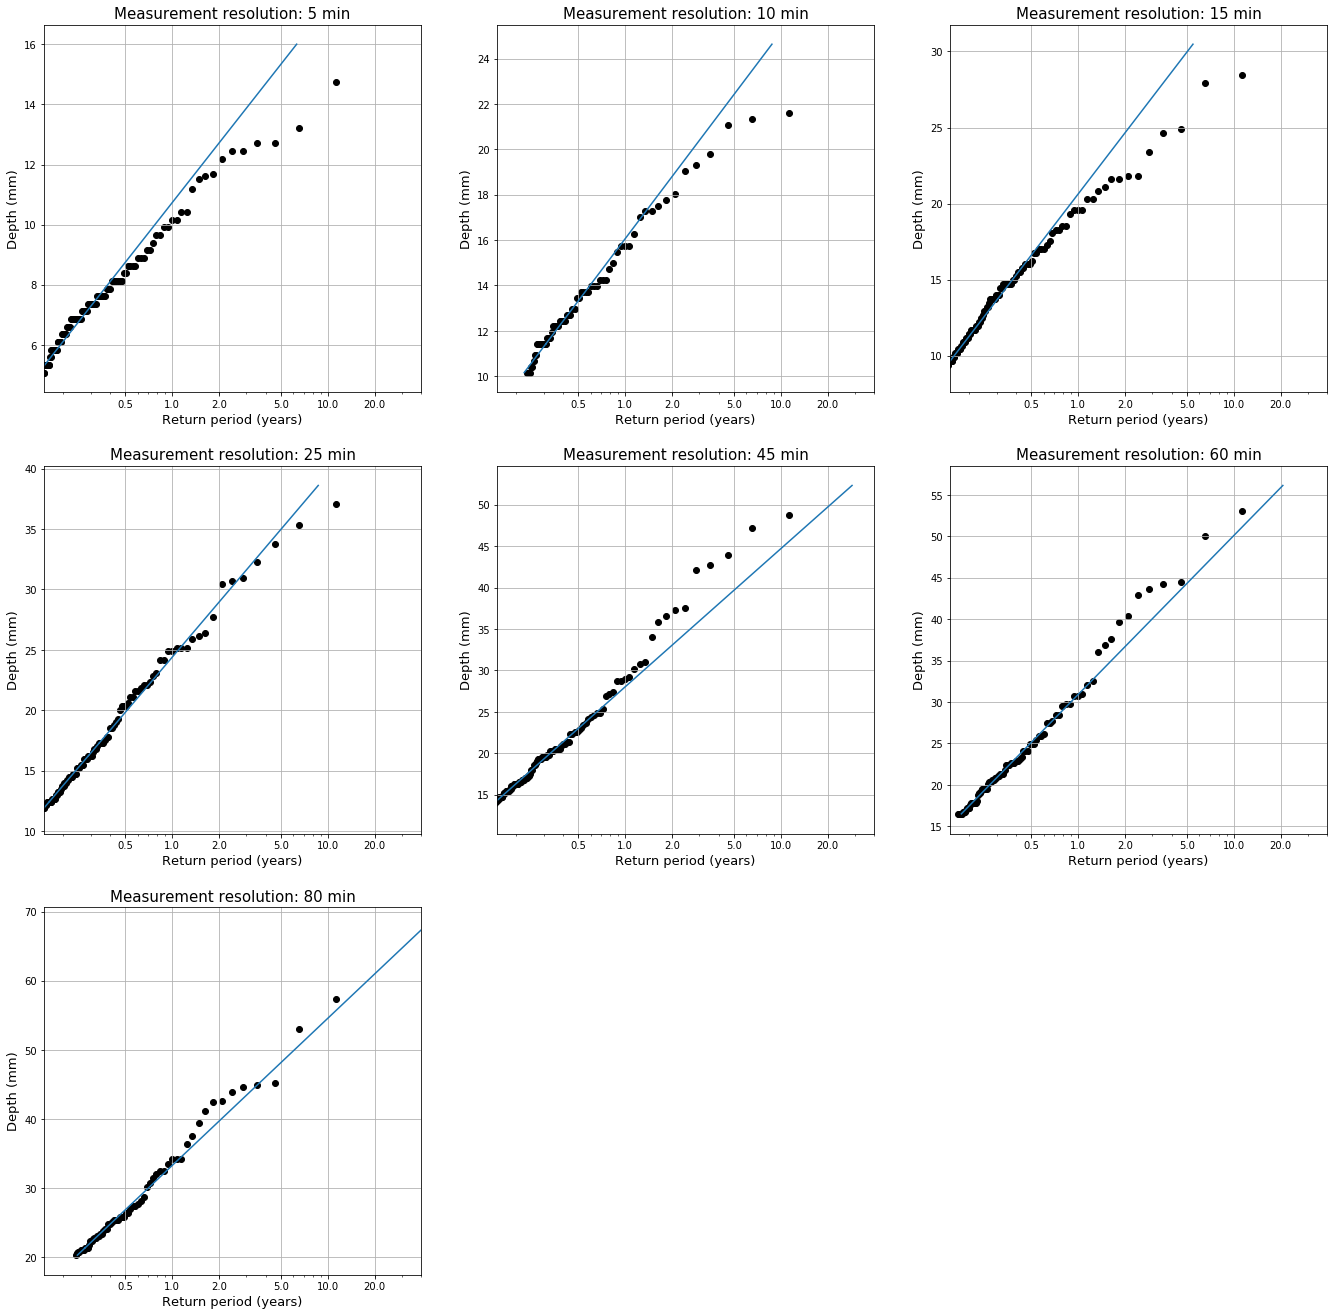

In [64]:
fig,ax = plt.subplots(3,3,figsize=(23,23))

for key,t,coords in zip(max_min_dict.keys(),thr,[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0)]):
    dict_ = max_min_dict[key][(max_min_dict[key]['max'].isnull()==False)&(max_min_dict[key]['max']>t)]
    max_list = dict_.sort_values(by='max',ascending=True)['max']
    npy = len(max_list)/ydata
    max_list = max_list.reset_index().drop(columns='index')
    max_list['index_'] = [things + 1 for things in max_list.index]
    max_list['max_mm'] = max_list['max']*25.4
    max_list_mm = max_list[max_list['max_mm']<200]
    pj = (max_list_mm.index_ - 0.35)/len(max_list_mm)
    x =max_list_mm['max'].values
    y = pj
    popt,pcov = curve_fit(func,x,y)
    pj_fit = func(x,*popt)
    Return_period_fit = ret_per(period=npy,prob=pj_fit)
    Return_period = ret_per(period=npy,prob=pj)

    ax[coords].plot(Return_period_fit, x*25.4)
    ax[coords].scatter(Return_period,x*25.4,color='black')
    ax[coords].grid(True)

    ax[coords].set_xscale('log')
    ax[coords].set_xticks([0.5,1,2,5, 10, 20])
    ax[coords].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax[coords].set_ylabel(r'Depth (mm)',fontsize = 13)
    ax[coords].set_xlabel(r'Return period (years)',fontsize=13)
    ax[coords].set_title(r'Measurement resolution: {} min'.format(key),fontsize = 15)
    ax[coords].set_xlim(0.15,40)
fig.delaxes(ax[(2,1)])
fig.delaxes(ax[(2,2)])

>**NOTE:** In project work, this was part was not calculated using python, but using an `R-package`. [The POT Package](pot.r-forge.r-project.org)

__________
## Depth duration frequency curves<a id='ddfc'></a>

From the previously derived return functions, the `depth duration frequency curves` are calculated by choosing a `return period year`

In [200]:
def func_ret_per(year):
    year = np.log10(year)
    return (year*slope + interc)

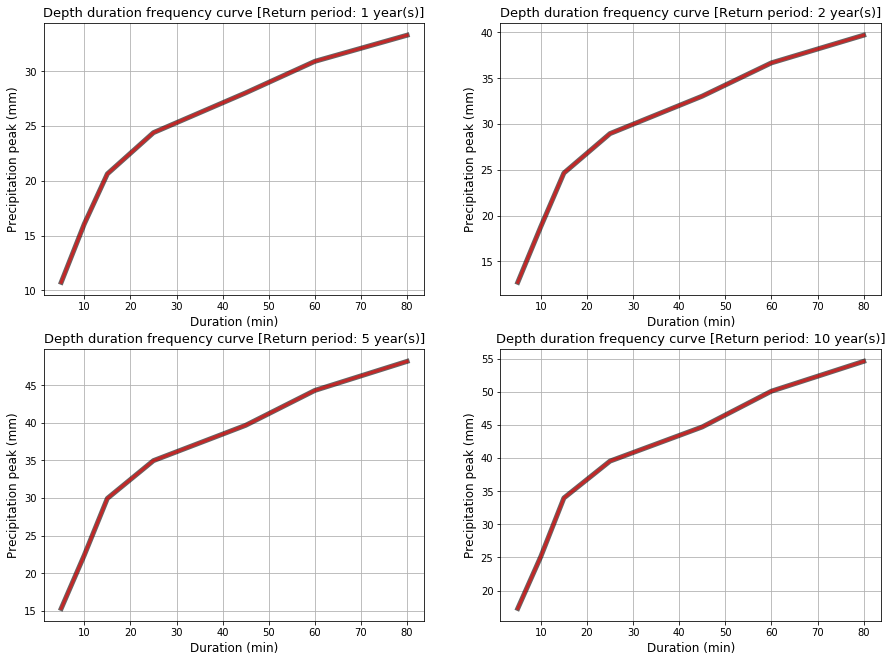

In [244]:
fig,ax = plt.subplots(2,2,figsize=(15,11))

return_year = [1,2,5,10]

for year_,coords in zip(return_year,[(0,0),(0,1),(1,0),(1,1)]):
    
    ddfc = []
    
    for key,t in zip(max_min_dict.keys(),thr):
        dict_ = max_min_dict[key][(max_min_dict[key]['max'].isnull()==False)&(max_min_dict[key]['max']>t)]
        max_list = dict_.sort_values(by='max',ascending=True)['max']
        npy = len(max_list)/ydata
        max_list = max_list.reset_index().drop(columns='index')
        max_list['index_'] = [things + 1 for things in max_list.index]
        max_list['max_mm'] = max_list['max']*25.4
        max_list_mm = max_list[max_list['max_mm']<200]
        pj = (max_list_mm.index_ - 0.35)/len(max_list_mm)
        x =max_list_mm['max'].values
        y = pj
        popt,pcov = curve_fit(func,x,y)
        pj_fit = func(x,*popt)
        Return_period_fit = ret_per(period=npy,prob=pj_fit)
        slope, interc = np.polyfit(np.log10(Return_period_fit),x*25.4,1)

        ddfc.append(func_ret_per(year_))
     
    ax[coords].plot([5,10,15,25,45,60,80],ddfc,linewidth=5,color='black',alpha=0.6)
    ax[coords].plot([5,10,15,25,45,60,80],ddfc,linewidth=3,color='red',alpha=0.6)
    ax[coords].grid(True)
    ax[coords].set_title(r'Depth duration frequency curve [Return period: {} year(s)]'.format(year_),fontsize = 13)
    ax[coords].set_xlabel(r'Duration (min)',fontsize=12)
    ax[coords].set_ylabel(r'Precipitation peak (mm)',fontsize=12)
    
    #ax[coords].set_xscale('log')

    #ax[coords].set_xticks([0.5,1,2,5, 10, 20])
    #ax[coords].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax[coords].set_ylabel(r'Depth (mm)',fontsize = 13)
    #ax[coords].set_xlabel(r'Return period (years)',fontsize=13)
    #ax[coords].set_title(r'Measurement resolution: {} min'.format(key),fontsize = 15)
    #ax[coords].set_xlim(0.15,40)

    
    


In the project work, the idea was then to derive a `correction factor` that will be applied to these `Depth duration frequency curves`, in order to correct for the bias that might transpire due to the measurement offset

______________

# Extras: `New ideas`<a id='extras'></a>

In the following, the study is based on the distributions of the original data from which the aggregated series where originated from.

The idea is to `disaggregate` the aggregated precipitation series into their `original 1 minute` resolution data. In order to assess the `bias` already before the construction of the **`Depth duration frequency curves`**.

In [245]:
from scipy import stats

look this thing later on

In [271]:
max_index_list = list(max_min_dict['60'][max_min_dict['60']['max']>.65]['index'])

In [272]:
test = {}
for resol in max_min_dict.keys():
    frame = []
    for i in max_index_list:
        for j in range(1,int(resol)+1):
            c = storms_agg_all[resol]['{}_{}'.format(i,j)]
            d = storms_agg_all[resol]['{}_{}_dec'.format(i,j)]
            #test = pd.DataFrame({'c':c,'d':d})
            frame.append((pd.DataFrame({'a':c,'b':d})))
    test['{}'.format(resol)] = pd.concat(frame).reset_index().drop(columns='index')
    test['{}'.format(resol)]['average'] = [np.average(things) for things in test['{}'.format(resol)]['b']]
    test['{}'.format(resol)]['mode'] = [stats.mode(things)[0] for things in test[resol]['b']]
    test['{}'.format(resol)]['median'] = [np.median(things) for things in test[resol]['b']]
    test['{}'.format(resol)]['stdev'] = [np.std(things) for things in test[resol]['b']]

/home/edgar/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/edgar/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/edgar/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/edgar/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/edgar/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/edgar/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
 

In [273]:
test['45']

,a,b,average,mode,median,stdev
0,0.01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000222,[0.0],0.00,0.001474
1,0.82,"[0.02, 0.03, 0.04, 0.03, 0.05, 0.07, 0.09, 0.1...",0.018222,[0.0],0.00,0.030531
2,0.00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,[0.0],0.00,0.000000
3,0.03,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000667,[0.0],0.00,0.003266
4,0.80,"[0.03, 0.04, 0.03, 0.05, 0.07, 0.09, 0.11, 0.1...",0.017778,[0.0],0.00,0.030647
5,0.00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,[0.0],0.00,0.000000
6,0.06,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.001333,[0.0],0.00,0.005416
7,0.77,"[0.04, 0.03, 0.05, 0.07, 0.09, 0.11, 0.1, 0.08...",0.017111,[0.0],0.00,0.030700
8,0.00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,[0.0],0.00,0.000000
9,0.10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.002222,[0.0],0.00,0.007857


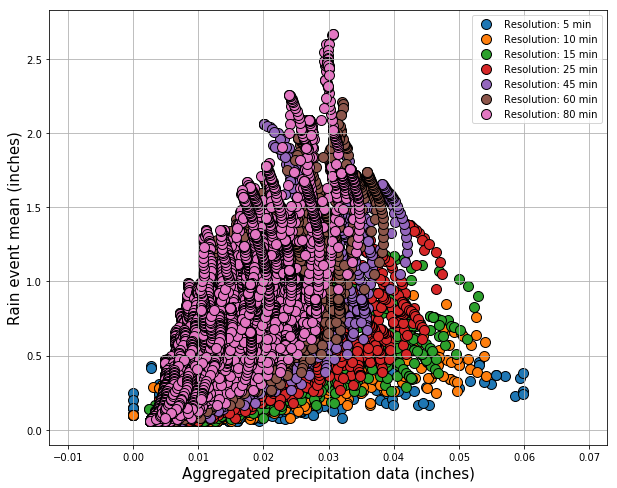

In [274]:
plt.figure(figsize=(10,8))
for i in test.keys():
    plt.scatter(test[i][test[i].a>0.05].stdev,test[i][test[i].a>0.05].a,label='Resolution: {} min'.format(i),s=100,edgecolors='black')
    plt.legend()
plt.gca().set_xlabel(r'Aggregated precipitation data (inches)',fontsize=15)
plt.gca().set_ylabel(r'Rain event mean (inches)',fontsize=15)
plt.gca().grid(True)
plt.show()

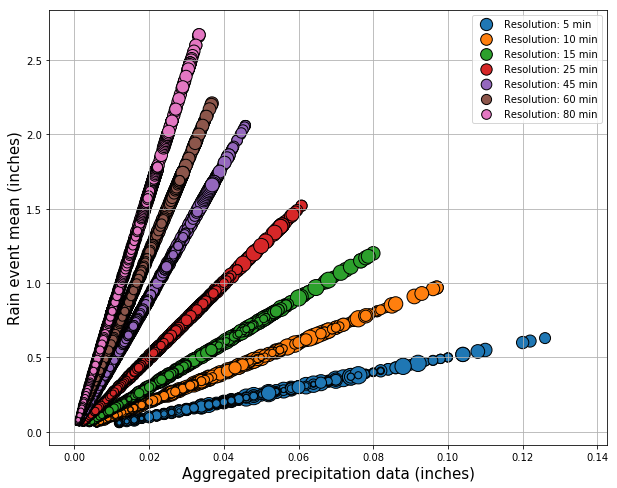

In [275]:
plt.figure(figsize=(10,8))
for i in test.keys():
    plt.scatter(test[i][test[i].a>0.05]['average'],test[i][test[i].a>0.05].a,label='Resolution: {} min'.format(i),edgecolors='black',s=test[i][test[i].a>0.05]['stdev']*5000)
    plt.legend()
#plt.colorbar()
plt.gca().set_xlabel(r'Aggregated precipitation data (inches)',fontsize=15)
plt.gca().set_ylabel(r'Rain event mean (inches)',fontsize=15)
plt.gca().grid(True)
plt.show()

Based only on fitting a line into the `aggregated precipitation` vs `rain event mean` and use it as a guide to know which distribution to use

>**NOTE**: This is just a starting idea, prob is best to use more than one parameter to describe from which distribution the aggregated series where originated from. 

In [277]:
i='15'
slope, interc = np.polyfit(test[i][test[i].a>0.05].a,test[i][test[i].a>0.05]['average'],1)

In [278]:
def func_1(x):
    avg_to_look = (x*slope + interc)
    up_avg,down_avg = avg_to_look+avg_to_look*.0005, avg_to_look - avg_to_look*.0005
    return up_avg, down_avg

**`Idea:`**

To use the `1 minute` distributions to disagreggate the aggregated data

In [279]:
storm_nmber = '267'

In [280]:
max_min_dict['15'].loc[max_min_dict['15']['index']==storm_nmber]

,max,min,index,length,average,bias
231,0.86,0.76,267,5,0.822,0.883721


In [281]:
for i in range(1,16):
    if np.around(np.max(storms_agg_all['15']['{}_{}'.format(storm_nmber,i)]),decimals=3) == 0.76:
        indx = i
        print(i)

12


In [283]:
from collections import Counter

In [284]:
simul = {}

for sim in range(1,300):
    rndm = {}
    cnter=0
    for num in storms_agg_all['15']['{}_{}'.format(storm_nmber,indx)]:
        if num != 0:
            #print(num)
            cnter +=1
            up_avg,down_avg = func_1(num)

            trhs = test['15'][(test['15']['average']>=down_avg)&(test['15']['average']<=up_avg)]

            first_thing = [things for things in trhs['b']]
            second_thing = [things for sublst in first_thing for things in sublst]
            count = Counter(second_thing)

            keys_count = []
            values = []
            for i in count.keys():
                keys_count.append(count[i])
                values.append(i)


            #np.sum(keys_count)  
            prob = keys_count/np.sum(keys_count)

            rndm['{}'.format(cnter)] = np.random.choice(values,15,p=prob)

            while np.around(np.sum(rndm['{}'.format(cnter)]),decimals=3)!= np.around(num,decimals=3):

                rndm['{}'.format(cnter)]  = np.random.choice(values,15,p=prob)
                np.sum(rndm['{}'.format(cnter)])

            #print(np.sum(rndm['{}'.format(cnter)] ))
        
    simul['{}'.format(sim)] = rndm



In [285]:
resol = 15

In [286]:
storms_sim = {}
for keys in simul.keys():
    
    gen_storm = []
    for i in simul[keys].keys():
        gen_storm.append(list(simul[keys][i]))

    gen_storm = [sbls for things in gen_storm for sbls in things]  
    example_storm = [np.zeros(resol),gen_storm,np.zeros(resol)]
    example_storm = [sbls for things in example_storm for sbls in things]  
    storms_sim['{}'.format(keys)] = example_storm

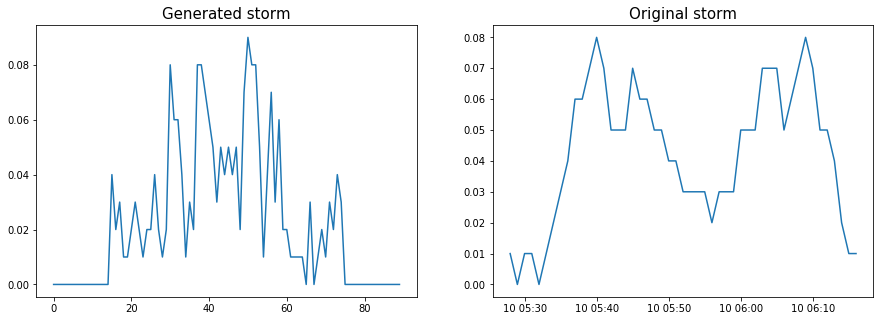

In [287]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(example_storm)
ax[0].set_title(r'Generated storm',fontsize=15)
ax[1].plot(storms_filtered[storm_nmber].time,storms_filtered[storm_nmber].precip)
ax[1].set_title(r'Original storm',fontsize = 15)
plt.show()

50 `generated storms`

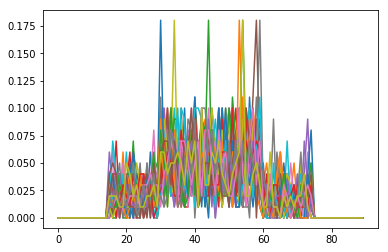

In [288]:
for i in range(1,50):
    plt.plot(storms_sim['{}'.format(i)])

Different peak combinations

(array([62., 65., 48., 54., 27., 19.,  9.,  7.,  5.,  3.]),
 array([0.76 , 0.781, 0.802, 0.823, 0.844, 0.865, 0.886, 0.907, 0.928,
        0.949, 0.97 ]),
 <a list of 10 Patch objects>)

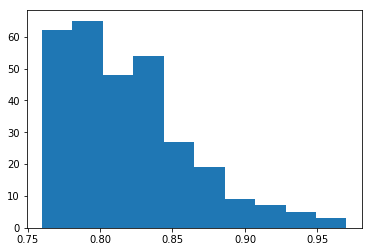

In [292]:
plt.hist(all_peaks)

In [289]:
all_peaks = [] 
for key in storms_sim.keys():
    
    resol = 15
    storm_peak = []
    for j in range(1,resol+1):
        msrmnt=[]
        for i in np.arange(0,len(storms_sim[key]),resol):
            a = sum(storms_sim[key][i+j:i+resol+j])
            msrmnt.append(a)

        storm_peak.append(np.max(msrmnt))
    all_peaks.append(np.max(storm_peak))

In [290]:
np.max(all_peaks)

0.9700000000000002

In [291]:
max(storms_agg_all['15']['{}_{}'.format(storm_nmber,indx)])

0.7600000000000002

In [293]:
np.average(all_peaks) + np.std(all_peaks)

0.8636369845294849

In [294]:
max_min_dict['15'].loc[max_min_dict['15']['index']==storm_nmber]

,max,min,index,length,average,bias
231,0.86,0.76,267,5,0.822,0.883721


Real precipitation peak closer to the average of all generated storms

### Example with all 15 minute resolution rain events

In [295]:
max_index_list = list(max_min_dict['15'][max_min_dict['15']['max']>.35]['index'])

In [296]:
i='15'
slope, interc = np.polyfit(test[i][test[i].a>0.05].a,test[i][test[i].a>0.05]['average'],1)

In [298]:
resol = 15

In [299]:
predicted_max = []
prcnt = 0
for storm_nmber in max_index_list:
    prcnt+=1
    print((prcnt/len(max_index_list))*100)
    #print(storm_nmber)
    
    indx = np.random.randint(1,resol+1)
    
    simul = {}

    for sim in range(1,300):
        rndm = {}
        cnter=0
        for num in storms_agg_all['{}'.format(resol)]['{}_{}'.format(storm_nmber,indx)]:
            if num != 0:
                #print(num)
                cnter +=1
                up_avg,down_avg = func_1(num)

                trhs = test['{}'.format(resol)][(test['{}'.format(resol)]['average']>=down_avg)&(test['{}'.format(resol)]['average']<=up_avg)]

                first_thing = [things for things in trhs['b']]
                second_thing = [things for sublst in first_thing for things in sublst]
                count = Counter(second_thing)

                keys_count = []
                values = []
                for i in count.keys():
                    keys_count.append(count[i])
                    values.append(i)


                #np.sum(keys_count)  
                prob = keys_count/np.sum(keys_count)

                rndm['{}'.format(cnter)] = np.random.choice(values,resol,p=prob)

                while np.around(np.sum(rndm['{}'.format(cnter)]),decimals=3)!= np.around(num,decimals=3):

                    rndm['{}'.format(cnter)]  = np.random.choice(values,resol,p=prob)
                    np.sum(rndm['{}'.format(cnter)])

                #print(np.sum(rndm['{}'.format(cnter)] ))

        simul['{}'.format(sim)] = rndm
    
    storms_sim = {}
    for keys in simul.keys():

        gen_storm = []
        for i in simul[keys].keys():
            gen_storm.append(list(simul[keys][i]))

        gen_storm = [sbls for things in gen_storm for sbls in things]  
        example_storm = [np.zeros(resol),gen_storm,np.zeros(resol)]
        example_storm = [sbls for things in example_storm for sbls in things]  
        storms_sim['{}'.format(keys)] = example_storm
        
        
    all_peaks = [] 
    
    for key in storms_sim.keys():

        
        storm_peak = []
        for j in range(1,resol+1):
            msrmnt=[]
            for i in np.arange(0,len(storms_sim[key]),resol):
                a = sum(storms_sim[key][i+j:i+resol+j])
                msrmnt.append(a)

            storm_peak.append(np.max(msrmnt))
        all_peaks.append(np.max(storm_peak))
        
    predicted_max.append((storm_nmber,np.average(all_peaks) + np.std(all_peaks),np.max(all_peaks)))

0.8547008547008548
1.7094017094017095
2.564102564102564
3.418803418803419
4.273504273504273
5.128205128205128
5.982905982905983
6.837606837606838
7.6923076923076925
8.547008547008547
9.401709401709402
10.256410256410255
11.11111111111111
11.965811965811966
12.82051282051282
13.675213675213676
14.529914529914532
15.384615384615385
16.23931623931624
17.094017094017094
17.94871794871795
18.803418803418804
19.65811965811966
20.51282051282051
21.367521367521366
22.22222222222222
23.076923076923077
23.931623931623932
24.786324786324787
25.64102564102564
26.495726495726498
27.350427350427353
28.205128205128204
29.059829059829063
29.914529914529915
30.76923076923077
31.62393162393162
32.47863247863248
33.33333333333333
34.18803418803419
35.04273504273504
35.8974358974359
36.75213675213676
37.60683760683761
38.46153846153847
39.31623931623932
40.17094017094017
41.02564102564102
41.88034188034188
42.73504273504273
43.58974358974359
44.44444444444444
45.2991452991453
46.15384615384615
47.00854700

In [300]:
compare = max_min_dict['{}'.format(resol)][max_min_dict['{}'.format(resol)]['max']>.35].reset_index()

In [301]:
predicted_maxdf = pd.DataFrame(predicted_max)

In [302]:
new_matrix = pd.concat([compare,predicted_maxdf],axis=1).drop(columns='level_0')

In [303]:
new_matrix['new_bias'] = new_matrix['max']/new_matrix[1]

### Individual `Storm` correction

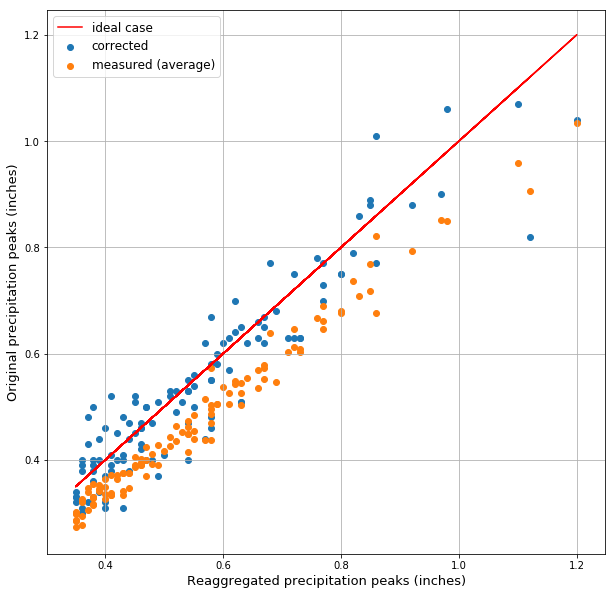

In [310]:
plt.figure(figsize=(10,10))
plt.scatter(new_matrix['max'],new_matrix[2],label='corrected')
plt.scatter(new_matrix['max'],new_matrix['average'],label='measured (average)')
plt.plot(new_matrix['max'],new_matrix['max'],color='red',label='ideal case')
plt.gca().grid(True)
plt.gca().set_ylabel(r'Original precipitation peaks (inches)',fontsize=13)
plt.gca().set_xlabel(r'Reaggregated precipitation peaks (inches)',fontsize=13)
#plt.gca().set_ylim(0.2,2)
#plt.gca().set_xlim(0.2,2)
plt.legend(fontsize=12)

plt.show()

The closer it is to the `red` line, the better the correction is. As seen above, it did already better than the average case. Meaning that it may improve by considering other characterization parameters from the original precipitation distributions